###### Install the required libraries and packages

In [ ]:
#pip install keras-tuner --upgrade                     # Install Keras Tuner   

In [ ]:
#!pip install nltk==3.8.1                              # Install nltk library

In [ ]:
#!pip install gensim==4.3.1                            # Install gensim library

In [ ]:
#!pip install tensorflow==2.7.0                        # tensorflow library

In [ ]:
#!pip intall keras==2.7.0                              # install keras library

In [ ]:
#!pip install scikit-learn==1.2.2                      # install scikit-learn library

In [2]:
#The necessary libraries are imported

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
from tqdm.notebook import tqdm
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pyarrow

In [7]:
#import nltk
#nltk.download()      # Download the necessary packagesof nltk

###### To allow all the available columns in the dataframe to be displayed on screen 

In [3]:
pd.set_option('display.max_columns',None)


###### The Amazon Musical Instruments Reviews tsv file is read into the Pandas Dataframe . The seperator is set to a raw tab value since the input file is of a format a tab seperated values

In [73]:
%%time
amazon= pd.read_table('amazon_reviews_us_Musical_Instruments_v1_00.tsv', sep=r'\t')

<timed exec>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


CPU times: total: 9.25 s
Wall time: 12.8 s


In [10]:
###### A brief info about the counts and datatypes of the features in the Amazon dataset

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904765 entries, 0 to 904764
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        904765 non-null  object
 1   customer_id        904765 non-null  int64 
 2   review_id          904765 non-null  object
 3   product_id         904765 non-null  object
 4   product_parent     904765 non-null  int64 
 5   product_title      904764 non-null  object
 6   product_category   904765 non-null  object
 7   star_rating        904765 non-null  int64 
 8   helpful_votes      904765 non-null  int64 
 9   total_votes        904765 non-null  int64 
 10  vine               904765 non-null  object
 11  verified_purchase  904765 non-null  object
 12  review_headline    904759 non-null  object
 13  review_body        904712 non-null  object
 14  review_date        904765 non-null  object
dtypes: int64(5), object(10)
memory usage: 103.5+ MB


###### Descriptive statistics of the amazon reviews dataset

In [256]:
amazon.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,9.047650e+05,9.047650e+05,904765.000000,904765.000000,904765.000000
mean,2.732872e+07,4.947710e+08,4.251103,1.861308,2.384755
std,1.551782e+07,2.887873e+08,1.216395,13.079296,13.886548
min,1.011300e+04,2.765700e+04,1.000000,0.000000,0.000000
25%,1.403545e+07,2.377961e+08,4.000000,0.000000,0.000000
50%,2.580814e+07,4.917281e+08,5.000000,0.000000,0.000000
75%,4.190720e+07,7.452023e+08,5.000000,1.000000,2.000000
max,5.309656e+07,9.999951e+08,5.000000,4709.000000,4805.000000


##### The first 5 rows of the amazon reviews dataset

In [240]:
amazon.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,45610553,RMDCHWD0Y5OZ9,B00HH62VB6,618218723,AGPtek® 10 Isolated Output 9V 12V 18V Guitar P...,Musical Instruments,3,0,1,N,N,Three Stars,"Works very good, but induces ALOT of noise.",2015-08-31
1,US,14640079,RZSL0BALIYUNU,B003LRN53I,986692292,Sennheiser HD203 Closed-Back DJ Headphones,Musical Instruments,5,0,0,N,Y,Five Stars,Nice headphones at a reasonable price.,2015-08-31
2,US,6111003,RIZR67JKUDBI0,B0006VMBHI,603261968,AudioQuest LP record clean brush,Musical Instruments,3,0,1,N,Y,Three Stars,removes dust. does not clean,2015-08-31
3,US,1546619,R27HL570VNL85F,B002B55TRG,575084461,Hohner Inc. 560BX-BF Special Twenty Harmonica,Musical Instruments,5,0,0,N,Y,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,2015-08-31
4,US,12222213,R34EBU9QDWJ1GD,B00N1YPXW2,165236328,Blue Yeti USB Microphone - Blackout Edition,Musical Instruments,5,0,0,N,Y,Five Stars,This is an awesome mic!,2015-08-31


###### Review having sentiment sentiment rating of 1

In [111]:
amazon[amazon['star_rating']==1].review_body[40]

'Really bad. Bought as a midi trigger kit but the latency from the module is ridiculous. Comlete waste of $$. A toy.'

###### Review having sentiment sentiment rating of 2

In [91]:
amazon[amazon['star_rating']==2].review_body[13]

'Bridge pickup was broken. I replace d the pickup and ok now. To cheap to send back.'

###### Review having sentiment sentiment rating of 3

In [93]:
amazon[amazon['star_rating']==3].review_body[0]

'Works very good, but induces ALOT of noise.'

###### Review having sentiment sentiment rating of 4

In [113]:
amazon[amazon['star_rating']==4].review_body[42]

'nice Microphone. good delivery'

###### Review having sentiment sentiment rating of 5

In [107]:
amazon[amazon['star_rating']==5].review_body[4]

'This is an awesome mic!'

###### The first 5 customer IDs are reviewed

In [11]:
amazon.customer_id[:5]

0    45610553
1    14640079
2     6111003
3     1546619
4    12222213
Name: customer_id, dtype: int64

In [242]:
# It is observed that there is only one product category

amazon.product_category.value_counts()

Musical Instruments    904765
Name: product_category, dtype: int64

In [255]:
# The range of helpful_votes
amazon[['helpful_votes']].value_counts()

helpful_votes
0                552441
1                152724
2                 64281
3                 36158
4                 22143
                  ...  
353                   1
357                   1
358                   1
359                   1
4709                  1
Length: 414, dtype: int64

###### The various feature data types are cast into types of smaller memory for efficiency

In [18]:
amazon['customer_id']=amazon['customer_id'].astype('int32')
amazon['product_parent']=amazon['product_parent'].astype('int32')
amazon['star_rating']=amazon['star_rating'].astype('int8')
amazon['helpful_votes']=amazon['helpful_votes'].astype('int16')
amazon['total_votes']=amazon['total_votes'].astype('int16')


amazon['review_id']=amazon['review_id'].astype(str)
amazon['product_id']=amazon['product_id'].astype(str)
amazon['product_title']=amazon['product_title'].astype(str)


amazon['vine']=amazon['vine'].astype(str)
amazon['verified_purchase']=amazon['verified_purchase'].astype(str)
amazon['review_headline']=amazon['review_headline'].astype(str)
amazon['review_body']=amazon['review_body'].astype(str)

amazon['review_date']=pd.to_datetime(amazon['review_date'], dayfirst=True)

##### Check for Missing Values in the dataset

In [19]:
amazon.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [20]:
#### Drop all the unrequired features for the sentiment classification task at hand

amazon.drop(['marketplace','customer_id','product_title',
             'product_category','product_id','product_parent',
             'helpful_votes','total_votes','vine','verified_purchase'],inplace=True,axis=1)

In [21]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904765 entries, 0 to 904764
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review_id        904765 non-null  object        
 1   star_rating      904765 non-null  int8          
 2   review_headline  904765 non-null  object        
 3   review_body      904765 non-null  object        
 4   review_date      904765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int8(1), object(3)
memory usage: 28.5+ MB


### Number of reviews per year

###### We have reviews from the year 1999 till 2015

In [9]:
amazon['review_date'].max()

Timestamp('2015-08-31 00:00:00')

In [10]:
amazon['review_date'].min()

Timestamp('1999-12-13 00:00:00')

###### A function is defined to read all the reviews values from a particular year into a dictionary indexed by the year key. A barplot is plotted to visualize the counts of reviews per year

In [9]:
def Reviews_per_Year(df):
    
    global Reviews_per_Year_dict
    Reviews_per_Year_dict={}
    
    for year_ in range(1999,2016):
        Reviews_per_Year_dict[year_]=(df[df['review_date'].dt.year==year_].shape[0])
    
    year=list(Reviews_per_Year_dict.keys())

    review_year_count=list(Reviews_per_Year_dict.values())
    
    plt.figure(figsize=(10, 6))

    sns.barplot(x=year,y=review_year_count)

    plt.xlabel('Year')
    plt.ylabel('Num of Reviews')
    plt.title('Num of Reviews per year')

    plt.show()
        

###### It is noted that the number of reviews per year increases in an exponential manner with the year 1999 having the least reviews and 2015 having the most reviews

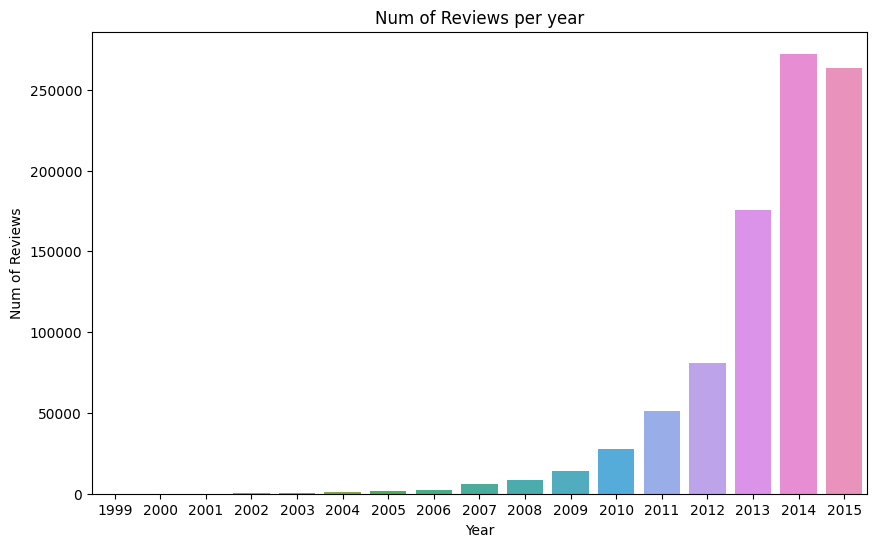

In [10]:
Reviews_per_Year(amazon)

In [8]:
#### A New Feature consisting of the year in which the review was posted is derived from
#### the original review date feature

amazon['Review_Year']=amazon['review_date'].dt.year

amazon['Review_Year']=amazon['Review_Year'].astype('int32')

amazon.drop('review_date',axis=1,inplace=True)

###### A function is defined to note the different review Star_Ratings and calculate the Percentage of star_ratings distributed in the dataset. A barplot is plotted to visualize the Percentage of star_ratings DIstribution

In [50]:
def Plot_Star_Rating(df):

        x_bar=list(df['star_rating'].astype('str').value_counts().index)
        total_count=df.shape[0]
        y_bar=list(((x/total_count)*100) for x in df['star_rating'].astype('str').value_counts().values)

        sns.barplot(x=x_bar,y=y_bar)

        plt.xlabel('Star_Rating')
        plt.ylabel('Percent Count')
        plt.title('Counts of Star_Rating')

        # Show the plot
        plt.show()

###### The Star_Ratings are the ratings given by the customers per product purchase and can be considered a measure of the sentiment of the customer's review of the product. From the distrbution of star ratings it is noted that there are 5 different ratings:
- 5: Very Positive
- 4: Positive
- 3: Neutral
- 2: Negative
- 1: Very Negative <br>
> We can see from the barplot below that the dataset is __highly imbalanced__ in terms of __Star_rating__ with a siginificant percentage of the dataset being 5 star rated reviews and the minority class being negative and very negative reviews

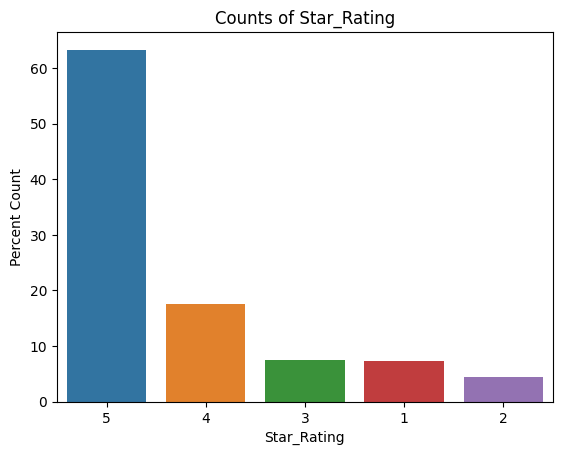

In [145]:
Plot_Star_Rating(amazon)

##### Duplicated Review Documents

In [22]:
from collections import Counter

In [24]:
#### The duplicate Review text rows

duplicates=amazon.duplicated(subset=['review_body'])

In [26]:
duplicated_counter=Counter(amazon.review_body[duplicates])

In [27]:
#### The most common duplicate reviews in descending counts order

duplicated_counter.most_common()

[('good', 1343),
 ('Good', 1277),
 ('Great', 1148),
 ('great', 917),
 ('Excellent', 852),
 ('Perfect', 564),
 ('ok', 544),
 ('Great!', 519),
 ('Works great', 507),
 ('Awesome', 478),
 ('Nice', 472),
 ('works great', 464),
 ('excellent', 462),
 ('Great product', 426),
 ('Works great!', 424),
 ('Love it', 423),
 ('nice', 394),
 ('very good', 389),
 ('perfect', 361),
 ('love it', 332),
 ('Very good', 330),
 ('Perfect!', 293),
 ('Excellent!', 278),
 ('Love it!', 269),
 ('Works great.', 252),
 ('Great product!', 252),
 ('Good product', 244),
 ('great product', 236),
 ('Thanks', 218),
 ('excelente', 205),
 ('Awesome!', 197),
 ('good product', 192),
 ('Excelente', 182),
 ('Excelent', 179),
 ('I love it', 164),
 ('Ok', 161),
 ('Works well', 161),
 ('Great product.', 159),
 ('works well', 156),
 ('A+', 156),
 ('thanks', 148),
 ('OK', 145),
 ('Works well.', 141),
 ('awesome', 139),
 ('Thank you', 138),
 ('Excellent product', 134),
 ('thank you', 133),
 ('Very nice', 132),
 ('Good quality', 129),

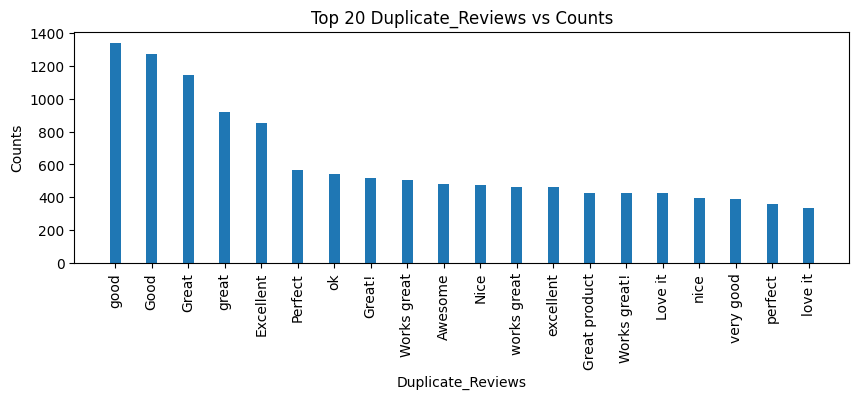

In [28]:
fig,ax = plt.subplots(figsize= (10,3))

categories=[text[0] for index,text
            in enumerate(duplicated_counter.most_common()) 
            if index<20]

values=[text[1] for index,text in
        enumerate(duplicated_counter.most_common())
       if index<20]

ax.bar(categories, values, width=0.3)

ax.set_xlabel('Duplicate_Reviews')
ax.set_ylabel('Counts')
ax.set_title('Top 20 Duplicate_Reviews vs Counts')

# Transpose x-axis labels
ax.tick_params(axis='x', rotation=90)

plt.show()

In [31]:
duplicate_indexes=[index for index in duplicates.index if duplicates[index]==True]

In [32]:
#### Total count of duplicate reviews

len(duplicate_indexes)

52976

In [33]:
#### Drop all the rows containing duplicate reviews

amazon.drop(duplicate_indexes, axis=0, inplace= True)   
    

In [34]:
amazon.reset_index(drop=True, inplace= True)    

In [35]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851789 entries, 0 to 851788
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review_id        851789 non-null  object        
 1   star_rating      851789 non-null  int8          
 2   review_headline  851789 non-null  object        
 3   review_body      851789 non-null  object        
 4   review_date      851789 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int8(1), object(3)
memory usage: 26.8+ MB


##### Number of Unique Reviews

In [36]:
amazon.review_body.unique().shape

(851789,)

##### Merging the multi class reviews into positive and negative sentiment reviews, while dropping the Neutral sentiment reviews.

In [37]:
for i in range(1,6):
    print('Star Rating ',i,':',amazon[amazon['star_rating']==i].shape[0])

Star Rating  1 : 65081
Star Rating  2 : 39779
Star Rating  3 : 65509
Star Rating  4 : 151681
Star Rating  5 : 529739


In [38]:
### NEUTRAL SENTIMENT REVIEWS

for review in amazon[amazon['star_rating']==3].review_body[0:5]:
    print(review, end='\n\n')

Works very good, but induces ALOT of noise.

removes dust. does not clean

Beautiful set. Only the sound not at long and deap.

There was only one clip in the box even though this is supposed to be a two pack.  The one we did receive works fine.  Nothing glamorous, but effective.

I love these lights they are very bright vibrant colors. The remote hasn't worked on them but they change colors and they flash.  Didn't come with 12v adapter either



In [39]:
### Indexes of the rows containing Neutral Sentiment Reviews

indexes_star_rating3= list(amazon[amazon['star_rating']==3].index)

In [40]:
### Dropping the rows containing Neutral sentiment reviews.

amazon.drop(indexes_star_rating3, axis=0, inplace=True)

In [41]:
amazon.reset_index(drop=True, inplace= True)

In [42]:
### Extracting the negative sentiment review rows and concatenating the
### dataframes along the row axis to get a Negative Sentiment Dataframe.
### This resulting Dataframe is set to sentiment 0 (Negative).

amazon_star_rating_1=amazon[amazon['star_rating']==1]
amazon_star_rating_2=amazon[amazon['star_rating']==2]

amazon_negative_sent= pd.concat((amazon_star_rating_1,amazon_star_rating_2),
                                 axis=0, ignore_index=True)

# Setting the negative class label as 0

amazon_negative_sent.star_rating = 0

In [43]:
amazon_negative_sent.head()

,review_id,star_rating,review_headline,review_body,review_date
0,R2HUWDNW62FOL3,0,Poor sound quality,"I was hoping it would work well, but tried a s...",2015-08-31
1,RUPNDVAV1ESYP,0,It works well while it can. Mine failed when ...,It works well while it can. Mine failed when I...,2015-08-31
2,R3DMITMQKN72XW,0,DON'T Buy This,Really bad. Bought as a midi trigger kit but t...,2015-08-31
3,R3QLFND7MRFFDW,0,One Star,Ok,2015-08-31
4,RJM45NORR02B3,0,sorry but wasnt made,sorry but wasnt made right,2015-08-31


In [44]:
### Extracting the positive sentiment review rows and concatenating the
### dataframes along the row axis to get a Positive Sentiment Dataframe.
### This resulting Dataframe is set to sentiment 1 (Positive).

amazon_star_rating_4=amazon[amazon['star_rating']==4]
amazon_star_rating_5=amazon[amazon['star_rating']==5]

amazon_positive_sent= pd.concat((amazon_star_rating_4,amazon_star_rating_5),
                                 axis=0, ignore_index=True)

amazon_positive_sent.star_rating = 1

In [45]:
amazon_positive_sent.head()

,review_id,star_rating,review_headline,review_body,review_date
0,R3H53KLLC210XI,1,Great pop filter - poor mount,"by far the best pop filter i have used, extrem...",2015-08-31
1,R31OIOD3CP2FB1,1,Four Stars,Fit my cheep over seas pickup but will not fit...,2015-08-31
2,R3QZ914CIV184O,1,Four Stars,nice Microphone. good delivery,2015-08-31
3,RZKKBS6QGHU1E,1,You get what you pay for,It does what it's supposed to do but it's chea...,2015-08-31
4,RQUZHB9KARAAG,1,No Problems.,"Works great, gave it 4 stars because there wer...",2015-08-31


In [47]:
amazon = pd.concat((amazon_negative_sent,amazon_positive_sent),
                                 axis=0, ignore_index=True)

# Shuffling the newly concatenated dataframe to avoid bias

amazon = amazon.sample(frac=1, random_state=41,
                               ignore_index=True)

In [48]:
amazon.reset_index(drop=True, inplace= True)

In [51]:
amazon['star_rating'].value_counts()

1    681420
0    104860
Name: star_rating, dtype: int64

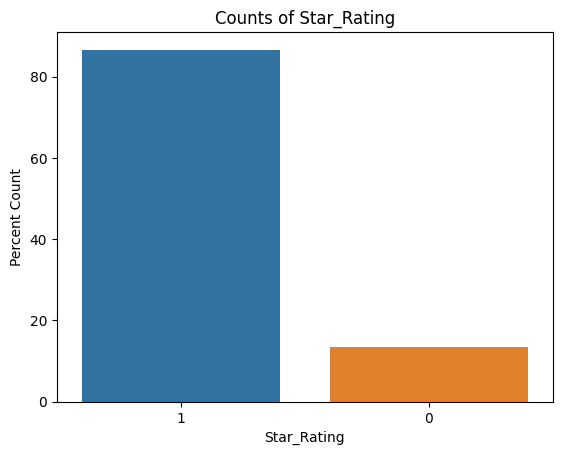

In [52]:
Plot_Star_Rating(amazon)

In [53]:
amazon.head(5)

,review_id,star_rating,review_headline,review_body,review_date
0,R3AO39ZIHC23LW,1,Perfect. Just what I wanted.,Got this for my Mahalo Uke and it's work great...,2013-05-22
1,R22QPG1FZOPJCY,0,Look elsewhere for coated strings.,"They sound decent enough, but they start deter...",2015-04-20
2,R1ZX1DVZT12UDU,0,Two of Three Sets With Bad Plating,I bought three sets of these. I opened one an...,2011-12-07
3,R2570D03RGVC4Q,0,missing click..,"so desapointed...just get it,,it dosent have t...",2012-11-29
4,R3A90PGUCFAO0E,1,Killer for the price,I thought I was going to have to spend a lot f...,2013-05-29


In [54]:
amazon.shape

(786280, 5)

### Balancing the target class distribution using  Random undersampler

#####  Considering computational power and timeframe the Dataset is large in size. It is undersampled while maintaining target class strata distribution using  Random Undersampling. The majority class will be undersampled and as a result the sample target classes will be balanced in the train dataset.

#### Undersampling the majority class using Random Undersampler

In [55]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [56]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(amazon[['review_body']], 
                                amazon[['star_rating']])

In [57]:
# The input and target features are concatenated to get the undersampled dataset

amazon=pd.concat((X_res,y_res),axis=1)

del(X_res, y_res)

In [58]:
# Shuffle the dataset

amazon=amazon.sample(frac=1, ignore_index=True, random_state=42)
amazon.reset_index(drop=True, inplace=True)

In [59]:
amazon.head(10)

,review_body,star_rating
0,"Purchased by my son, he is very happy with thi...",1
1,Product seemed to look nice but 3 plugs in bac...,0
2,I bought these to replace a skull candy pair t...,1
3,I purchased this microphone because of its pri...,1
4,I read great things about these online so I fi...,0
5,Wish the flab thingy would stick to the screen!,0
6,My wife loves it.....Got it for her for Mother...,1
7,"again, a gift for my nephew... very pleased",1
8,"I own a few AXL guitars (El Dorado, Capricorn ...",0
9,"I bought this cow bell on price, to use in a b...",0


In [60]:
amazon.shape

(209720, 2)

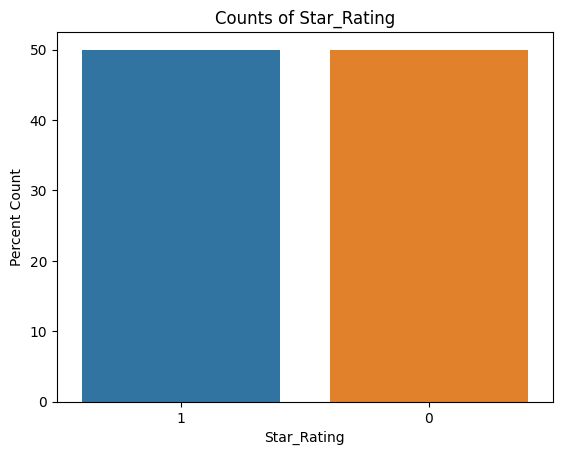

In [62]:
Plot_Star_Rating(amazon)

###  PreProcessing of Review_Body Text

In [63]:
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
from nltk.probability import FreqDist
import re

from nltk.tokenize import wordpunct_tokenize


from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

In [64]:
####Total number of stopwords in nltk

len(stopwords.words('english'))

179

In [65]:
text=' '.join(amazon['review_body'])

TOP WORDS IN REVIEWS Before PreProcessing


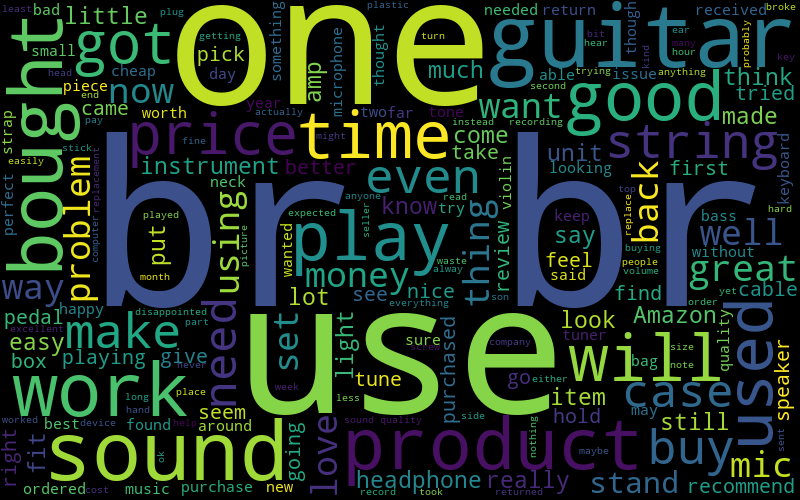

In [44]:
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate(text)
print('TOP WORDS IN REVIEWS Before PreProcessing')
wordcloud.to_image()

In [47]:
#  Load the the nltk punkt sentence tokenizer

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [46]:
# Regular expressions are used to search for web addresses in the reviews data. The pattern is compiled and matched in the data

pattern = re.compile(r'https?://\S+')

In [48]:
matches=pattern.finditer(text)

In [49]:
for i in matches:
    print(i)
    break

<re.Match object; span=(169654, 169741), match='http://www.amazon.com/gp/product/B0017H4EBG/ref=o>


###### A pre-preocessing class object is constructed which takes in the dataframe and the un-processed review column name as input. A cleaning function is created for this class which will take each review text, expand the contracted words, remove unwanted symbols,web-addresses, numbers and white spaces  and convert the text to lowercase. Finally for each tokenized word, it will filter the stopwords and lemmatize the tokens to their base root form based on their part of speech. The main() method will apply this cleaning function to each of the reviews in the dataframe and return a processed dataframe containing an additional processed reviews column.

In [66]:
class txtprc():
    
    
    def __init__(self,df,raw=str(),target=str()):
        self.df = df
        self.raw = raw
        self.target = target
        
        
    def main(self): 
        
        def clean(text):
            
         
            text=contractions.fix(text)   # Expand the contractions
            
            #remove website addres
            
            text_pr = re.compile(r'https?://\S+').sub('',str(text))                                 
            text_pr = re.sub(r"e-mail","email",text_pr)
            
            #remove html text tags such as <br>
            text_pr=re.sub(r'<[\w\s\W]+>',' ',text,flags=re.IGNORECASE)
            
            #remove numbers and other characters such as Punctuation emoticons
            text_pr = re.sub(r'[^a-zA-Z!?]',' ',text_pr)  
            
            text_pr = re.sub(r'\s+',' ',text_pr)  #remove white spaces, tabs, linebreaks
            text_pr=text_pr.lower()    
            
            processed = []
            
           # Remove words like not nor and no from stopwords list as they are important 
           # sentiment analysis
            
            stp_wrds=stopwords.words('english')
            for index,word in enumerate(['no','nor','not']):
                stp_wrds.remove(word)
            
            # We lemmatize the different forms of words to their root word to save memory 
            #and improve classification efficiency
            
            lemmatizer = WordNetLemmatizer()
            
            for i in nltk.pos_tag(wordpunct_tokenize(text_pr)):               # Loop through word tokens
                
                    if i[0] not in stp_wrds:
                        if i[1].startswith('N'):
                            processed.append(lemmatizer.lemmatize(i[0],'n'))            # Lemmatization of tokens according to
                        elif i[1].startswith('V'):
                            processed.append(lemmatizer.lemmatize(i[0],'v'))            # token part of speech such as noun,verb
                        elif i[1].startswith('J'):
                            processed.append(lemmatizer.lemmatize(i[0],'a'))            # or adverb
                        elif i[1].startswith('R'):
                            processed.append(lemmatizer.lemmatize(i[0],'r'))
                        else:
                            processed.append(lemmatizer.lemmatize(i[0]))
            
            
            processed_str = ' '.join(processed)                                   # All the lemmatized clean tokens are joined 
                                                                                  # as a string and returend by function
            return processed_str
        

        self.df['processed'] = self.df[self.raw].map(lambda x : clean(x).lower())        # Clean function applied to each review
        
        return self.df

In [67]:
processed_text=txtprc(amazon,raw='review_body',target='star_rating')

amazon_processed=processed_text.main()

In [58]:
amazon_processed.head()

,review_body,star_rating,processed
0,"Purchased by my son, he is very happy with thi...",1,purchase son happy sing bowl sound produce
1,Product seemed to look nice but 3 plugs in bac...,0,product seem look nice plug back not work not ...
2,I bought these to replace a skull candy pair t...,1,buy replace skull candy pair come apart superi...
3,I purchased this microphone because of its pri...,1,purchase microphone price positive word friend...
4,I read great things about these online so I fi...,0,read great thing online figure worth go howeve...


###### Drop the reviews which were null after being processed

In [176]:
amazon_processed[amazon_processed['processed']==''].head()

,review_body,star_rating,processed
1278,A++++,1,
4556,ㅎㅌㅊ,0,
5625,😡👎,0,
17462,😤,0,
22813,90%,1,


In [177]:
amazon_processed.drop(list(amazon_processed[amazon_processed['processed']==''].index),
                            axis=0,
                            inplace=True)

amazon_processed.reset_index(drop=True, inplace=True)

###### The first two processed reviews

In [7]:
for index,review in enumerate(amazon_processed):
    if index<=1:
        print('Raw Review Text: ',)
        print(amazon_processed.review_body[index],'\n\n')
        print('Processed Review Text: ')
        print(amazon_processed.processed[index])
        print('----------------------','\n\n')

Raw Review Text: 
Purchased by my son, he is very happy with this Singing Bowl and the sound it produces 


Processed Review Text: 
purchase son happy sing bowl sound produce
---------------------- 


Raw Review Text: 
Product seemed to look nice but 3 plugs in back don't work I was not satisfied And the vu only works part of the time it was a waste of money 


Processed Review Text: 
product seem look nice plug back not work not satisfied vu work part time waste money
---------------------- 




In [7]:
# Saving the amazon preprocessed dataset

amazon_processed.to_csv('Applied_Research_Project.csv')

In [5]:
amazon_processed= pd.read_csv('Balanced_amazon_processed.parquet')

##### WordCloud for the most Common Words in the processed dataset

Most Frequent Words in the Processed Reviews


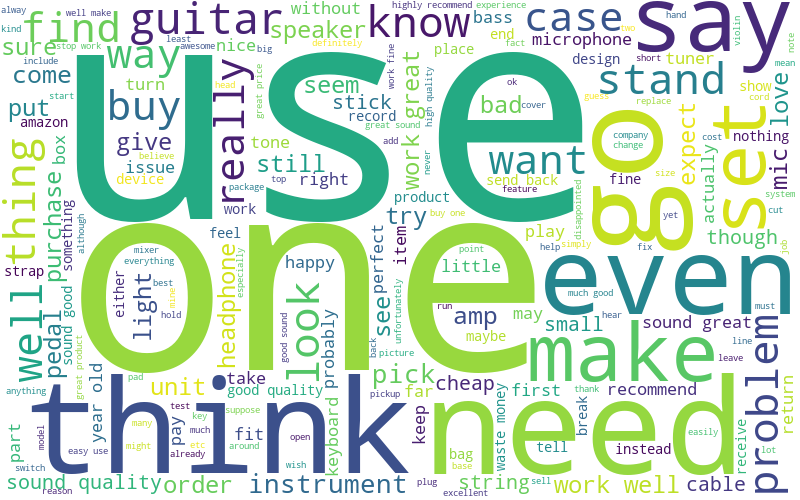

In [60]:
long_string = " ".join(amazon_processed['processed'])
wordcloud = WordCloud(width=800, height=500,background_color ='white')
print('Most Frequent Words in the Processed Reviews')
wordcloud.generate(long_string)
wordcloud.to_image()

##### Vocabulary size (Number of unique words) of the processed dataset

In [61]:
len(set(long_string.split()))

61137

##### Total Number of Words in the amazon processed reviews

In [62]:
len((long_string.split()))

6171327

##### Total Number of Documents in the Train Corpus

In [63]:
amazon_processed['processed'].shape[0]

209720

In [64]:
### WORD COUNTS IN DESCENDING ORDER
word_counts = pd.Series(' '.join(amazon_processed['processed'])
                        .lower().split()).value_counts()

word_counts

not            195100
use             68962
sound           66843
get             66714
one             61405
                ...  
averagely           1
kurzweill           1
libary              1
defiency            1
kabeldirekt         1
Length: 61137, dtype: int64

###### Wrds that appear less than 10 times throughout the Entire Copus

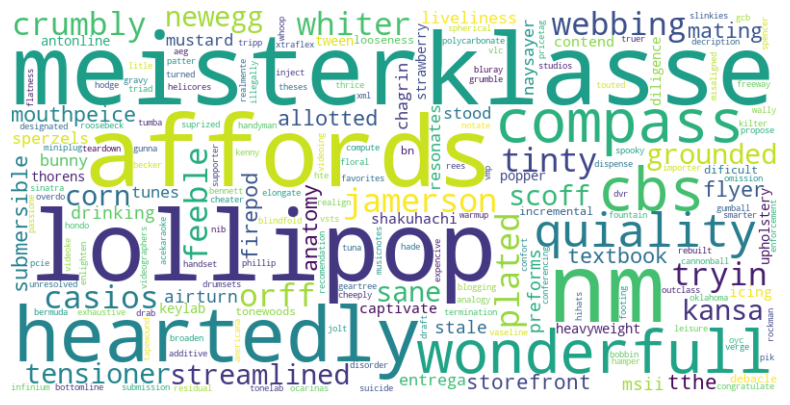

In [65]:
# Example: Consider words that appear less than 10 times 
# throughout the Corpus as Rare

threshold = 10  
rare_words = word_counts[word_counts < threshold]

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate_from_frequencies(rare_words)
    
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()    


# Sentiment Classification using Machine Learning models

#### TfIDF Vectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
from sklearn.naive_bayes import MultinomialNB


from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




## Multinomial Naive Bayes Classifier

### 10 Fold Cross Validation of Multinomial Naive Bayes Classifier 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train-Test split

X_train,X_test,y_train,y_test= train_test_split(amazon_processed.processed,
                                                amazon_processed.star_rating,
                                                test_size=0.2,
                                                stratify=amazon_processed.star_rating,
                                                shuffle=True, random_state=42)                                          

###### We develop a pipeline consisting of Tfidf vectorizer  and the classifier. This will allow a streamlined flow of the feature vectorisation and classification process. It also helps in avoiding test data leakage as the tf-idf transformer will be fit on the training data and the same vectorizer will be used to transform the testset. The vectors obtained will be used to train the classifier and validate on the test set.

In [215]:
estimators = [('tfidf', TfidfVectorizer()),                           
              
              ('multinom_NB', MultinomialNB())]

cachedir = mkdtemp()          # Create a temp memory location to save
                              # the tf-idf transformer outputs once the transformer fits over all the datapoints.
                              #This helps in avoiding redundant computations in subsequent folds

pipe = Pipeline(estimators, memory=cachedir)
pipe

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmpg9860j3o',
         steps=[('tfidf', TfidfVectorizer()), ('multinom_NB', MultinomialNB())])

###### The pipe is passed as the estimator unit to the cross validator and 10 fold cross validation is implemented

In [216]:
from sklearn.metrics import (make_scorer, precision_score, 
                            recall_score, f1_score)

prec_macro = make_scorer(precision_score, average='macro')         # The scoring metrics of the classifier are created and 
rec_macro  = make_scorer(recall_score, average='macro')            # passed to the cross validator
f1_score   = make_scorer(f1_score, average='macro')

scoring = { 'acc': 'accuracy',
            'prec_macro': prec_macro,
            'rec_macro': rec_macro,
            'f1-score': f1_score}

X= amazon_processed.processed                               
Y= amazon_processed.star_rating

scores_Multinom_NB = cross_validate(pipe, X, Y, 
                                    scoring=scoring,
                                    cv=10, return_train_score=True,
                                    verbose=2, n_jobs=-1)                 # n-jobs is set to -1 to use all the CPU cores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   24.1s remaining:   56.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.7s finished


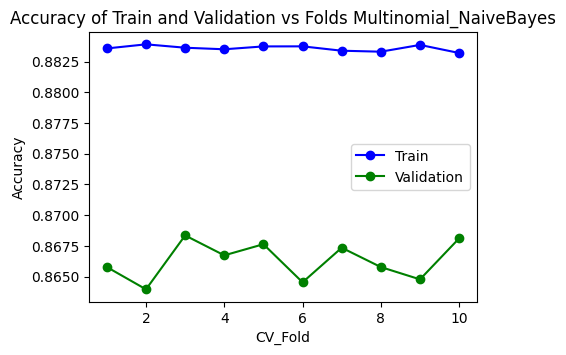

In [217]:
# The accuracy of the classifier on the train and validation sets is plotted per fold

fig,ax= plt.subplots(figsize=(5,3.5))

folds=[1,2,3,4,5,6,7,8,9,10]

ax.plot(folds, scores_Multinom_NB['train_acc'], color='blue', label='Train', marker='o')
ax.plot(folds, scores_Multinom_NB['test_acc'], color='green', label='Validation', marker='o')
ax.set_xlabel('CV_Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Train and Validation vs Folds Multinomial_NaiveBayes')
ax.legend()

plt.show()

In [16]:
# A function is defined to retrieve the evaluation scores of the cross validator and return 
# the mean of the scores for the 10 folds

def classification_metrics(score_dict):
    
    mean_test_acc       =  np.mean(score_dict['test_acc'])
    mean_test_recall    =  np.mean(score_dict['test_rec_macro'])
    mean_test_precision =  np.mean(score_dict['test_prec_macro'])
    mean_test_f1_score  =  np.mean(score_dict['test_f1-score'])
    mean_fit_time       =  np.mean(score_dict['fit_time'])
    mean_score_time     =  np.mean(score_dict['score_time'])
    
    return mean_test_acc,mean_test_recall,mean_test_precision,mean_test_f1_score,mean_fit_time,mean_score_time

In [17]:
test_acc,test_recall,test_precision,test_f1_score,fit_time,score_time=classification_metrics(scores_Multinom_NB)

In [18]:
print('10 FOLD CROSS VALIDATION TEST METRIC RESULTS MULTINOMIAL NAIVE BAYES CLASSIFIER','\n\n',\
      'test_accuracy: ',test_acc,'\n',\
      'test_recall: ',test_recall,'\n',\
      'test_precision: ',test_precision,'\n',\
      'test_f1_score: ',test_f1_score,'\n',\
       'Fit_time:', fit_time,'\n',\
       'Prediction_time:',score_time,sep='')

10 FOLD CROSS VALIDATION TEST METRIC RESULTS MULTINOMIAL NAIVE BAYES CLASSIFIER

test_accuracy: 0.8662979210375739
test_recall: 0.8662979210375739
test_precision: 0.8663045960521787
test_f1_score: 0.8662973112882207
Fit_time:12.340850472450256
Prediction_time:0.7715849637985229


In [225]:
rmtree(cachedir)               # Delete the temp directory

### Tuning for the best Hyper-Parameters of MultinomialNB using Grid Search CV

In [78]:
# Estimator pipeline consisting of Tf-Idf transformer and Naive Bayes classifier is defined.
# It shall be passed to the Grid_search cross validator

estimators_grid = [('tfidf', TfidfVectorizer()),
              ('multinom_NB', MultinomialNB())]

cachedir = mkdtemp()

pipe_grid = Pipeline(estimators_grid, memory=cachedir)
pipe_grid

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp16phcl18',
         steps=[('tfidf', TfidfVectorizer()), ('multinom_NB', MultinomialNB())])

In [79]:
# The hyperparameter space is defined and is passed to the Grid-search 10-fold Cross validator 

param_grid = dict(tfidf__ngram_range=[(1,1),(1,2),(1,3)],                            
                  tfidf__min_df=[10,100],
                  tfidf__max_df=[0.6,0.8],
                  multinom_NB__alpha= [0.001,0.01,0.1, 1.0],    #Alpha is regularisation smoothing constant             
                  )

from sklearn.metrics import f1_score, make_scorer

# The F1-score is passed as scoring metric to Grid-search CV

f1 = make_scorer(f1_score, average='macro')                 

grid_search = GridSearchCV(pipe_grid, 
                           param_grid=param_grid,
                           cv=10, 
                           scoring=f1, n_jobs=10,             
                           verbose=2)

In [80]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\miniconda\lib\site-packages\sklearn\pipeline.py:359: UserWarning: Persisting input arguments took 18.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


GridSearchCV(cv=10,
             estimator=Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp16phcl18',
                                steps=[('tfidf', TfidfVectorizer()),
                                       ('multinom_NB', MultinomialNB())]),
             n_jobs=10,
             param_grid={'multinom_NB__alpha': [0.001, 0.01, 0.1, 1.0],
                         'tfidf__max_df': [0.6, 0.8],
                         'tfidf__min_df': [10, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [81]:
# The best hyperparameter obtained by Grid Search CV

grid_search.best_params_

{'multinom_NB__alpha': 1.0,
 'tfidf__max_df': 0.6,
 'tfidf__min_df': 10,
 'tfidf__ngram_range': (1, 3)}

In [82]:
# The best cross validated score obtained by the Grid Search CV

grid_search.best_score_

0.9024250854500506

In [11]:
# Time taken for the training of the model using the best hyperparameter set on the whole trainset

grid_search.refit_time_

52.204750537872314

In [13]:
# Time taken by the best model to predict the testset

start_time=time.time()

y_pred_MultiNB=grid_search.predict(X_test)

end_time=time.time()-start_time

print('Time taken by the best model to predict the testset:  ', end_time)

Time taken by the best model to predict the testset:   2.0999507904052734


##### Classification Report Multinomial Naive Bayes Classifier trained using best hyperparameters

In [14]:
print(classification_report(y_test,y_pred_MultiNB, digits=4))

              precision    recall  f1-score   support

           0     0.9043    0.8977    0.9010     20972
           1     0.8984    0.9050    0.9017     20972

    accuracy                         0.9013     41944
   macro avg     0.9014    0.9013    0.9013     41944
weighted avg     0.9014    0.9013    0.9013     41944



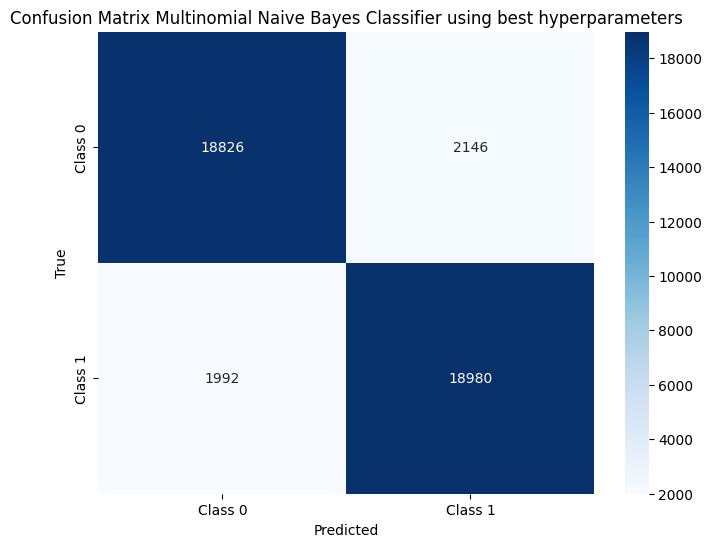

In [16]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_MultiNB, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Multinomial Naive Bayes Classifier using best hyperparameters')
plt.show()

In [88]:
rmtree(cachedir)                       # Delete the temp directory

## Logistic Regression Classifier

##### 10 Fold Cross Validation of Log Reg Classifier 

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
# A pipiline is contructed

estimators = [('tfidf', TfidfVectorizer()),
              ('lr', LogisticRegression(max_iter=1000))]   # Maximum number of iterations of model weight updation to converge
                                                           # to a minimal loss
cachedir = mkdtemp()

pipe = Pipeline(estimators, memory=cachedir)
pipe

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp7yfpry9_',
         steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [229]:
from sklearn.metrics import (make_scorer, precision_score, 
                            recall_score, f1_score)

prec_macro = make_scorer(precision_score, average='macro')             # The scoring metrics of the classifier are created and
rec_macro  = make_scorer(recall_score, average='macro')                # passed to the cross validator
f1_score   = make_scorer(f1_score, average='macro')

scoring = { 'acc': 'accuracy',
            'prec_macro': prec_macro,
            'rec_macro': rec_macro,
            'f1-score': f1_score}


scores_logreg = cross_validate(pipe, X,Y,                              # The verbosity is set to 2 to print the results during 
                               scoring=scoring,                        # cross validation
                               cv=10, return_train_score=True, 
                               verbose=2, n_jobs=10)                                       

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   31.8s remaining:  1.2min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   33.1s finished


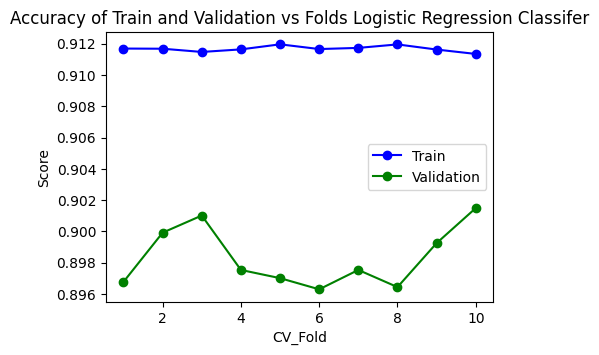

In [230]:
# The Train and Validation accuracy of Logistic Regression Classifer is plotted per Fold 

fig,ax= plt.subplots(figsize=(5,3.5))

folds=[1,2,3,4,5,6,7,8,9,10]

ax.plot(folds, scores_logreg['train_acc'], color='blue', 
        label='Train', marker='o')
ax.plot(folds, scores_logreg['test_acc'], color='green', 
        label='Validation', marker='o')

ax.set_xlabel('CV_Fold')
ax.set_ylabel('Score')
ax.set_title('Accuracy of Train and Validation vs Folds Logistic Regression Classifer')
ax.legend()

plt.savefig('Accuracy_CrossVal_LogReg.png')

plt.show()

In [20]:
test_acc_log,test_recall_log,test_precision_log,test_f1_score_log,fit_time_log,score_time_log=classification_metrics(scores_logreg)

In [21]:
print('10 FOLD CROSS VALIDATION TEST METRIC RESULTS Logistic Regression Classifer','\n\n',\
      'test_accuracy: ',test_acc_log,'\n',\
      'test_recall: ',test_recall_log,'\n',\
      'test_precision: ',test_precision_log,'\n',\
      'test_f1_score: ',test_f1_score_log,'\n',\
       'Fit_time:', fit_time_log,'\n',\
       'Prediction_time:',score_time_log,sep='')

10 FOLD CROSS VALIDATION TEST METRIC RESULTS Logistic Regression Classifer

test_accuracy: 0.898321571619302
test_recall: 0.8983215716193019
test_precision: 0.8983262650215517
test_f1_score: 0.8983212741334089
Fit_time:20.609524512290953
Prediction_time:0.8587849378585816


In [103]:
rmtree(cachedir)                     # Delete the temp directory

### Tuning for the best Hyper-Parameters of Logistic Regression using Grid Search CV

In [124]:
# Estimator pipeline consisting of Tf-Idf transformer and Logistic Regression classifier is defined.
# It shall be passed to the Grid_search cross validator

estimators_grid_Logreg = [('tfidf', TfidfVectorizer()),
              ('lr_clf', LogisticRegression(max_iter=1000))]                  

cachedir = mkdtemp()

pipe_grid_Logreg = Pipeline(estimators_grid_Logreg, memory=cachedir)
pipe_grid_Logreg

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp98ifutxi',
         steps=[('tfidf', TfidfVectorizer()),
                ('lr_clf', LogisticRegression(max_iter=1000))])

In [125]:
# The hyperparameter space is defined and is passed to the Grid-search 10-fold Cross validator

param_grid = dict(tfidf__ngram_range=[(1,1),(1,2),(1,3)],
                tfidf__min_df=[10,100],
                  tfidf__max_df=[0.6,0.8],
                  lr_clf__C=[1e-4,0.001,0.01,0.1,1]       # C is regularisation constant and prevents the model
                  )                                       # from overfitting the data

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average='macro')

grid_search_logreg = GridSearchCV(pipe_grid_Logreg, param_grid=param_grid,
                                  cv=10, scoring=f1, n_jobs=10,
                                  verbose=2)

In [126]:
grid_search_logreg.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\miniconda\lib\site-packages\sklearn\pipeline.py:359: UserWarning: Persisting input arguments took 18.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


GridSearchCV(cv=10,
             estimator=Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp98ifutxi',
                                steps=[('tfidf', TfidfVectorizer()),
                                       ('lr_clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=10,
             param_grid={'lr_clf__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'tfidf__max_df': [0.6, 0.8],
                         'tfidf__min_df': [10, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [127]:
# The best hyperparameter obtained by Grid Search CV

grid_search_logreg.best_params_

{'lr_clf__C': 1,
 'tfidf__max_df': 0.6,
 'tfidf__min_df': 10,
 'tfidf__ngram_range': (1, 3)}

In [128]:
# The best cross validated score obtained by the Grid Search CV

grid_search_logreg.best_score_

0.916697815246927

In [18]:
# Time taken for the training of the model using the best hyperparameter set on the whole trainset

grid_search_logreg.refit_time_

56.356250047683716

In [19]:
# Time taken by the best model to predict the testset

start_time=time.time()

y_pred_logreg= grid_search_logreg.predict(X_test)

end_time=time.time()-start_time

print('Time taken by the best model to predict the testset:  ', end_time)

Time taken by the best model to predict the testset:   1.9021222591400146


###### Classification Report of Logistic Regression classifier trained using best Hyperparameter set

In [20]:
print(classification_report(y_test,y_pred_logreg, digits=4))

              precision    recall  f1-score   support

           0     0.9161    0.9164    0.9163     20972
           1     0.9164    0.9161    0.9162     20972

    accuracy                         0.9162     41944
   macro avg     0.9162    0.9162    0.9162     41944
weighted avg     0.9162    0.9162    0.9162     41944



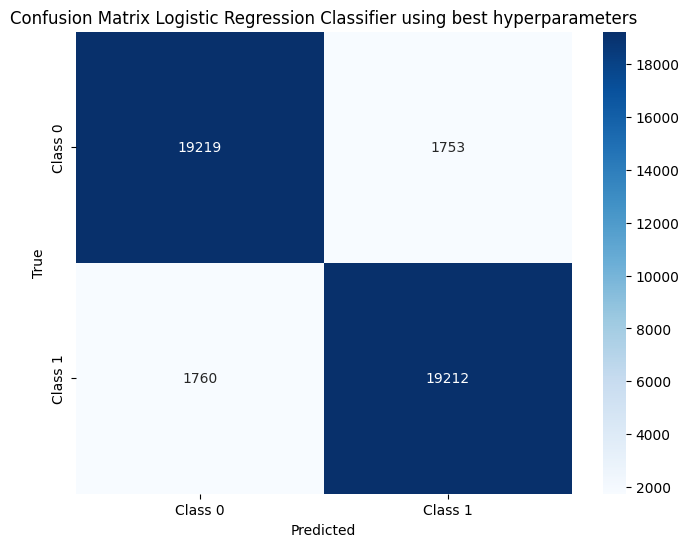

In [21]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_logreg, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Logistic Regression Classifier using best hyperparameters')
plt.show()

In [105]:
rmtree(cachedir)                     # Delete the temp directory

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp6ebrib0l'

## Support Vector Classifier 

In [38]:
from sklearn.svm import LinearSVC

In [39]:
estimators = [('tfidf', TfidfVectorizer()),
               ('SVC', LinearSVC())]

cachedir = mkdtemp()

pipe = Pipeline(estimators, memory=cachedir)
pipe

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmpww36435f',
         steps=[('tfidf', TfidfVectorizer()), ('SVC', LinearSVC())])

In [40]:
from sklearn.model_selection import cross_validate

from sklearn.metrics import (make_scorer, precision_score, 
                            recall_score, f1_score)

prec_macro = make_scorer(precision_score, average='macro')     
rec_macro  = make_scorer(recall_score, average='macro')
f1_score   = make_scorer(f1_score, average='macro')

scoring = { 'acc': 'accuracy',
            'prec_macro': prec_macro,
            'rec_macro': rec_macro,
            'f1-score': f1_score}

X=amazon_processed.processed
Y=amazon_processed.star_rating

scores_SVC = cross_validate(pipe, X, Y, 
                             scoring=scoring,
                             cv=10, return_train_score=True,
                             verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   27.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.3s finished


In [41]:
test_acc_SVC,test_recall_SVC,test_precision_SVC,test_f1_score_SVC,fit_time,score_time=classification_metrics(scores_SVC)

In [42]:
print('10 FOLD CROSS VALIDATION TEST METRIC RESULTS','\n\n',\
      'test_accuracy: ',test_acc_SVC,'\n',\
      'test_recall: ',test_recall_SVC,'\n',\
      'test_precision: ',test_precision_SVC,'\n',\
      'test_f1_score: ',test_f1_score_SVC, '\n',\
      'fit_time: ', fit_time, '\n',\
      'score_time: ',score_time,sep='')

10 FOLD CROSS VALIDATION TEST METRIC RESULTS

test_accuracy: 0.8952555788670609
test_recall: 0.8952555788670609
test_precision: 0.8952641452435828
test_f1_score: 0.8952550171374934
fit_time: 15.61154134273529
score_time: 0.7426803112030029


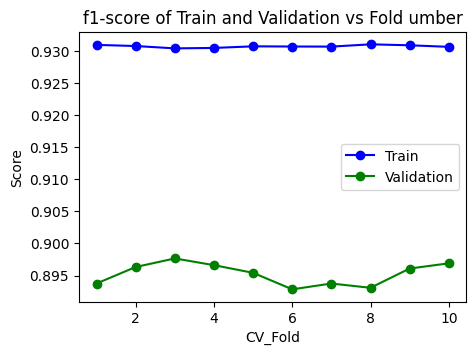

In [43]:
fig,ax= plt.subplots(figsize=(5,3.5))

folds=[1,2,3,4,5,6,7,8,9,10]

ax.plot(folds, scores_SVC['train_f1-score'], color='blue', label='Train', marker='o')
ax.plot(folds, scores_SVC['test_f1-score'], color='green', label='Validation', marker='o')
ax.set_xlabel('CV_Fold')
ax.set_ylabel('Score')
ax.set_title('f1-score of Train and Validation vs Fold umber')
ax.legend()

plt.show()

### Tuning for the best Hyper-Parameters of SVC using Grid Search CV

In [139]:
estimators_grid_SVC = [('tfidf', TfidfVectorizer()),
                       ('SVC', LinearSVC())]

cachedir = mkdtemp()

pipe_grid_SVC = Pipeline(estimators_grid_SVC, memory=cachedir)
pipe_grid_SVC

Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp_5riw6dy',
         steps=[('tfidf', TfidfVectorizer()), ('SVC', LinearSVC())])

In [140]:
param_grid = dict(tfidf__ngram_range=[(1,1),(1,2),(1,3)],
                tfidf__min_df=[10,100],
                  tfidf__max_df=[0.6,0.8],
                  SVC__C=[1,1e-1, 1e-2, 1e-3,1e-4]           #C is regularisation constant which leads to smooth margin SVMs
                  )

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average='macro')

grid_search_SVC = GridSearchCV(pipe_grid_SVC, 
                                   param_grid=param_grid,
                                   cv=10, scoring=f1, 
                                   n_jobs=10,
                                   verbose=2)

In [142]:
grid_search_SVC.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\miniconda\lib\site-packages\sklearn\pipeline.py:359: UserWarning: Persisting input arguments took 17.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


GridSearchCV(cv=10,
             estimator=Pipeline(memory='C:\\Users\\ANEESH~1\\AppData\\Local\\Temp\\tmp_5riw6dy',
                                steps=[('tfidf', TfidfVectorizer()),
                                       ('SVC', LinearSVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [1, 0.1, 0.01, 0.001, 0.0001],
                         'tfidf__max_df': [0.6, 0.8],
                         'tfidf__min_df': [10, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [28]:
# The best cross validated score obtained by the Grid Search CV

grid_search_SVC.best_score_

0.9185098660114386

In [27]:
# The best hyperparameter obtained by Grid Search CV

grid_search_SVC.best_params_

{'SVC__C': 0.1,
 'tfidf__max_df': 0.6,
 'tfidf__min_df': 10,
 'tfidf__ngram_range': (1, 3)}

In [26]:
# Time taken for the training of the model using the best hyperparameter set on the whole trainset

grid_search_SVC.refit_time_

54.928555488586426

In [29]:
# Time taken by the best model to predict the testset

start_time=time.time()

y_pred_SVC=grid_search_SVC.predict(X_test) 

end_time=time.time()-start_time

print('Time taken by the best model to predict the testset:  ', end_time)

Time taken by the best model to predict the testset:   2.005186080932617


###### Classification Report Support Vector Classifier trained using best Hyperparameter set

In [30]:
print(classification_report(y_test,y_pred_SVC, digits=4))

              precision    recall  f1-score   support

           0     0.9177    0.9187    0.9182     20972
           1     0.9187    0.9177    0.9182     20972

    accuracy                         0.9182     41944
   macro avg     0.9182    0.9182    0.9182     41944
weighted avg     0.9182    0.9182    0.9182     41944



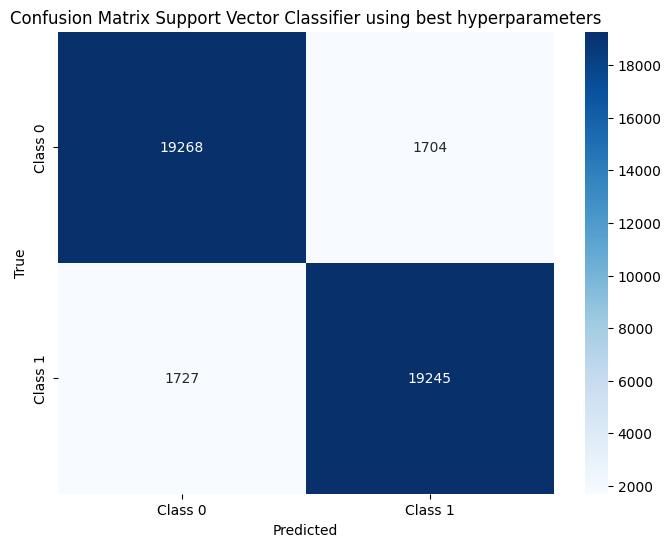

In [31]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_SVC, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Support Vector Classifier using best hyperparameters')
plt.show()

In [85]:
rmtree(cachedir)

# Sentiment Classification using Deep Learning models

In [22]:
# Import tensorflow

import tensorflow as tf

In [23]:
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.7.0


In [24]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


### To convert the text reviews into numeric vectors to feed into the neural network we will use the Word2Vec algorithm which is an unsupervised text vectorisation based on a neural network. We will import the pretrained Word2vec model trained on Google News. 

In [19]:
import gensim.downloader

# Download the google pre-trained Word2Vec model

word2vec_model = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# Save the download word2vec-google-news-300 model in binary format

from gensim.models import KeyedVectors

# Save the vectors to a file

word2vec_model.save_word2vec_format("word2vec_model.txt", binary=True)

In [25]:
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model in binary format

word2vec = KeyedVectors.load_word2vec_format("word2vec_model.txt", 
                                          binary=True)

###### There is a total of 300000 words and its vectors. Each vector has a dimension of 300 which captures the meaning of each word and its relation and context to other words

In [32]:
vocab=word2vec.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  3000000


In [116]:
word2vec_vector = word2vec.get_vector('king')

In [117]:
# Dimension of word2vec vecor 

word2vec_vector.shape

(300,)

In [118]:
word2vec.most_similar('Guitar')

[('guitar', 0.6482495665550232),
 ('Guitars', 0.639025092124939),
 ('Piano', 0.5972932577133179),
 ('Autoharp', 0.5947816371917725),
 ('Mandolin', 0.5770671963691711),
 ('Guitar_Player', 0.5768842101097107),
 ('guitarists', 0.5736500024795532),
 ('Ukulele', 0.5734299421310425),
 ('Acoustic_Guitar', 0.5714870691299438),
 ('guitars', 0.5576277375221252)]

In [35]:
# Sme of the words in word2vec model

word2vec.index_to_key[20:26]

['I', 'have', 'he', 'will', 'has', '####']

In [269]:
# import punkt tokenizer

import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.tokenize import wordpunct_tokenize

###### We calculate the 85h percentile review length and shall pad truncate our reviews to that length

In [69]:
review_len= []

for review in amazon_processed.processed:
    length= len(wordpunct_tokenize(review))
    review_len.append(length)

In [70]:
# 85 percent and less of the documents have a Review length of 51

np.percentile(review_len,85)

51.0

###### Maximum Length of a review in processed dataset

In [75]:
np.percentile(review_len,100)

2199.0

In [75]:
# Import keras tokinzer and padder

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [72]:
X_train.shape, X_test.shape

((167776,), (41944,))

###### We will be using the Keras tokenizer which creates a vocabulary from the documents. It converts each and every document to a numeric vector with the words mapped to their numeric index in the vocabulary. We will fit the tokenizer on the train data only and then transform the train and test data from the trainset vocabulary. This prevents data leakage from the test set


###### All the reviews in the train and test datsets shall be padded with zeroes to convert them to vectors of the same size. This will facilitate the Neural Network fitting process

In [73]:
def padding_tokenizer(X_train, X_test, num_words, max_review_len):
    
    global vocab_size
    
    global tok
    
    tok = Tokenizer(num_words)                         # Reviews are tokenized using a vocabulary of 5000 most common words
    
    tok.fit_on_texts(X_train)
    
    vocab_size = len(tok.word_index) + 1               # total no of words in tokenizer vocabulary

    encd_reviews_train = tok.texts_to_sequences(X_train)       # Encoded Trainset
    
    encd_reviews_test = tok.texts_to_sequences(X_test)         # Encoded Testset  

    # now padding to have a maximum length of 50

    pad_reviews_train= pad_sequences(encd_reviews_train, 
                           maxlen=max_review_len, 
                           padding='pre')                    # Pre-padding is used to pad the reviews with zeroes at the 
                                                             # beginning of each review
    pad_reviews_test= pad_sequences(encd_reviews_test, 
                           maxlen=max_review_len, 
                           padding='pre')
    
    return pad_reviews_train,pad_reviews_test,

In [76]:
# Reviews are tokenized using a vocabulary of 5000 most common words and padded to have an uniform length of 50 tokens

pad_reviews_train,pad_reviews_test=padding_tokenizer(X_train=X_train,
                                                     X_test=X_test,
                                                     num_words= 5000,            
                                                     max_review_len= 50 )

###### We can observe the padded reviews have the same word feature length of 50

In [77]:
pad_reviews_train.shape, pad_reviews_test.shape

((167776, 50), (41944, 50))

### We will now create an embedding matrix which will contain the word2vec vectors corresponding to each word in the tokenized vocabulary such that each i-th vector in the matrix will correspond to the i-th indexed word in the vocabulary

In [32]:
 # total no of words

vocab_size = len(tok.word_index) + 1  

# embedding dimension as choosen in word2vec constructor

embedd_dims=300

# max length of a review

max_review_len= 50 

In [19]:
vocab_size

54262

In [29]:
# now creating the Google embedding matrix

embedd_matrix_google=np.zeros(shape=(vocab_size,embedd_dims))

for word,i in tqdm(tok.word_index.items()):
        if word in word2vec.index_to_key:
            embedd_matrix_google[i]=word2vec.get_vector(word)

  0%|          | 0/54261 [00:00<?, ?it/s]

In [93]:
# The embedding matrix containing Google word2vec word embeddings is saved

np.save('embedding_matrix__google_word2vec.npy', embedd_matrix_google)

In [30]:
# Load the Google embedding matrix

embedd_matrix_google=np.load('embedding_matrix__google_word2vec.npy' )

In [24]:
embedd_matrix_google.shape

(54262, 300)

###### We will check how many vectors of words were successfully extracted from the Google pretrained word2vec vector set. Some of the words in our corpus may be absent in the Google pretrained corpus.

In [25]:
all_zero_arrays = np.all(embedd_matrix_google == 0, axis=1)

# Find the indices of arrays where all elements are zero
indices_with_all_zeros = np.where(all_zero_arrays)[0]

In [26]:
# 21833 words were not found in the Google Pretrained corpus

indices_with_all_zeros.shape

(22848,)

###  Custom Word Embedding by training Word2vec model on the Amazon Musical Instrument Review Dataset from scratch.

###### To train a Word2vec model it has to be passed sentences of each document, each sentence broken down into its constituent words. We build the preprocessing function.

In [45]:
def clean(text):
            
         
            text=contractions.fix(text)   # Expand the contractions
            
            text_pr = re.compile(r'https?://\S+').sub('',str(text)) #remove website addres                                
            text_pr = re.sub(r"e-mail","email",text_pr)
            text_pr=re.sub(r'<[\w\s\W]+>',' ',text_pr,flags=re.IGNORECASE)#remove html text tags such as <br>
            text_pr = re.sub(r'[^a-zA-Z!?]',' ',text_pr)  #remove numbers other characters such as Punctuation
            text_pr = re.sub(r'\s+',' ',text_pr)  #remove white spaces
            text_pr=text_pr.lower()    
            
            processed = []
             
            stp_wrds=stopwords.words('english')
            for index,word in enumerate(['no','nor','not']):
                stp_wrds.remove(word)
            
            lemmatizer = WordNetLemmatizer()
            
            for i in nltk.pos_tag(wordpunct_tokenize(text_pr)):
                    
                    if i[0] not in stp_wrds:
                        if i[1].startswith('N'):
                            processed.append(lemmatizer.lemmatize(i[0],'n'))
                        elif i[1].startswith('V'):
                            processed.append(lemmatizer.lemmatize(i[0],'v'))
                        elif i[1].startswith('J'):
                            processed.append(lemmatizer.lemmatize(i[0],'a'))
                        elif i[1].startswith('R'):
                            processed.append(lemmatizer.lemmatize(i[0],'r'))
                            
                            
                        else:
                            processed.append(lemmatizer.lemmatize(i[0]))
        
            
            
            processed_str = ' '.join(processed)
            
            return processed_str

###### We pass each each sentence of corresponding reviews, preprocess them, break the preprocessed sentence into individual words and finally append these words as lists to the sentences list.

In [46]:
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

sentences=[]

sum=0

for review in tqdm(amazon_processed['processed']):
    
    sents=sent_tokenizer.tokenize(review.strip())
    
    sum+=len(sents)
    
    for sent in sents:
        processd_sent=clean(sent)
        sentences.append(processd_sent.split()) 
        
print(sum)
print(len(sentences))  # total no of sentences

100%|█████████████████████████████████████████████████████████████████████████| 199042/199042 [21:30<00:00, 154.29it/s]

260255
260255


###### The Word2vec model is initialized such that the output vectors will have dimension of 300.
######  The "window size" refers to the number of words surrounding a target word that are considered as context words for the purpose of training the model. The window size determines the range within which the model looks for context words when predicting the target word. (CBOW Continuous Bag of Words)
######  min_count parameter specifies the minimum number of times a word must appear in the corpus to be included in the vocabulary and considered for word embeddings.

In [87]:
import gensim
w2v_amazon=gensim.models.Word2Vec(sentences=sentences,
                                  vector_size=300,
                                  window=10,
                                  min_count=1)       

NameError: name 'sentences' is not defined

In [49]:
# training of Word2vec model on Amazon dataset

w2v_amazon.train(sentences,epochs=10,total_examples=len(sentences))

(51124190, 58499230)

In [50]:
w2v_amazon.save("word2vec_amazon.model")  # Save the saved Word2Vec model trained on Amamzzon dataset

In [30]:
# Load the saved Word2Vec model
w2v_amazon = Word2Vec.load("word2vec_amazon.model")

In [166]:
# Words present in the Custom trained word embeddings

w2v_amazon.wv.index_to_key

['not',
 '!',
 'use',
 'sound',
 'get',
 'good',
 'one',
 'work',
 'buy',
 'guitar',
 'would',
 'great',
 'like',
 'make',
 'play',
 'well',
 'product',
 'quality',
 'no',
 'look',
 'price',
 'go',
 'time',
 'string',
 'come',
 'really',
 'even',
 'need',
 'want',
 'try',
 'purchase',
 'much',
 'say',
 'could',
 'back',
 'set',
 'love',
 'also',
 'case',
 'year',
 'little',
 'think',
 'stand',
 'first',
 'thing',
 'nice',
 'return',
 'recommend',
 'light',
 'mic',
 'money',
 'cheap',
 'take',
 'fit',
 'find',
 'tune',
 'give',
 'break',
 'easy',
 'music',
 'way',
 'order',
 'cannot',
 'two',
 'instrument',
 'problem',
 'know',
 'headphone',
 'cable',
 'amp',
 'review',
 'new',
 'bad',
 'still',
 'item',
 'right',
 'high',
 'put',
 'small',
 'pick',
 'amazon',
 'bass',
 'day',
 'seem',
 'pedal',
 'record',
 'box',
 'hold',
 'old',
 'low',
 'speaker',
 'long',
 'lot',
 'expect',
 '?',
 'unit',
 'never',
 'another',
 'see',
 'month',
 'something',
 'receive',
 'microphone',
 'feel',
 'pay

###### We will create an embedding matrix and populate it with the word2vec word vectors trained on the Amazon Reviews dataset.

In [33]:
# now creating the empty embedding matrix

embedd_matrix_amazon=np.zeros(shape=(vocab_size,embedd_dims))

for word,i in tqdm(tok.word_index.items()):
    
        if word in w2v_amazon.wv.index_to_key:
            
            embedd_matrix_amazon[i]=w2v_amazon.wv.get_vector(word)

  0%|          | 0/54261 [00:00<?, ?it/s]

In [34]:
embedd_matrix_amazon.shape

(54262, 300)

###### Check how many word vectors could not be extracted in the amazon embedded matrix

In [35]:
all_zero_arrays = np.all(embedd_matrix_amazon == 0, axis=1)

# Find the indices of arrays where all elements are zero
indices_with_all_zeros = np.where(all_zero_arrays)[0]

indices_with_all_zeros.shape

(12489,)

In [37]:
# Save the NumPy embedding matrix to a binary file

np.save('embedding_matrix_amazon.npy', embedd_matrix_amazon)

In [103]:
# Load the embedded matrix 

embedd_matrix_amazon= np.load('embedding_matrix_amazon.npy')

In [38]:
# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Create a new session
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto())

# Neural Network trained using Google pre-trained word embeddings

######  To input the padded vectors into the neural network, we define a Keras Embedding layer which shall accept the padded index vectors of dataset and map the index of the words to the corresponding word2vec vector in the embedding matrix as output. The input shape shall be (batch_size, padded_sentence length). The output shape shall be (batch_size,padded_sentence length, word2vec vector dimension).
###### The trainable parameter of embedding layer is set to false so as to avoid disturbing the pre trained weights

In [34]:
import keras
from tensorflow.keras.layers import Embedding
import keras_tuner
from keras.initializers import Constant
from keras.layers import Dropout,Flatten
from keras import layers
from tensorflow.keras.optimizers import Adam

## Artificial Neural Network (ANN) Google word2vec word embeddings

###### The ANN hypermodel is constructed which consists of an initial embedding layer taking the review token sequences as input. The input shape is (batch_size, sequence_length=50) and for each word within the review, it shall do a lookup in the word2vec embedding matrix and output a sequence of word embeddings corresponding to the input sequence. The output shape is (batch_size=128, sequence_length=50, embedding_dim=300). 

###### The hyperparameters are defined and the number of layers and the number of neurons per layer, dropout rate and the learning rate of the optimizer are tuned.

In [33]:
def build_model_ANN_google(hp):                             # hp is the keras hyperparamter object
    
    model_ANN = keras.Sequential()
    
    model_ANN.add(Embedding(input_dim=vocab_size,
                    output_dim=embedd_dims,
                    input_length=max_review_len,
                    embeddings_initializer=Constant(embedd_matrix_google), # Set pre-trained vectors as initial weights
                    trainable=False))                              # Keep the pre-trained weights fixed during training
    
    model_ANN.add(Flatten())
    
    for i in range(hp.Int('num_layers', 2, 20)):
        model_ANN.add(layers.Dense(units=hp.Int('units_' + str(i),
                                                 min_value=32,
                                                 max_value=512,
                                                 step=32),
                                                 activation='relu'))
    

    model_ANN.add(layers.Dropout(rate=hp.Choice('dropout_rate',[0.2,0.3,0.5])))    # Prevent model model overfitting
    
    model_ANN.add(layers.Dense(1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    
    model_ANN.compile(optimizer=Adam(learning_rate=learning_rate),
                                     loss='binary_crossentropy',
                                     metrics=['accuracy'])
                  
    return model_ANN

In [35]:
build_model_ANN_google(keras_tuner.HyperParameters())

In [27]:
# The Keras Random tuner object is instantiated.The random search tuner is set to run for 10 trials such that 
# for each trial two models with the same set of hyperparameters will be evaluated

In [36]:
tuner_ANN_google = keras_tuner.RandomSearch(hypermodel=build_model_ANN_google,
                                            objective="val_accuracy",
                                            max_trials=10,
                                            executions_per_trial=2,
                                            directory="Research_Project",
                                            project_name="Amazon_ANN")

INFO:tensorflow:Reloading Tuner from Research_Project\Amazon_ANN\tuner0.json


In [52]:
# Hyperparameter search pace summary

tuner_ANN_google.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_rate (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [55]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


tuner_ANN_google.search(pad_reviews_train, y_train, 
                 epochs=20, 
                 validation_data=(pad_reviews_test, y_test),
                 callbacks= [early_stopping])

Trial 10 Complete [00h 02m 53s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.8515520691871643
Total elapsed time: 00h 29m 21s
INFO:tensorflow:Oracle triggered exit


###### ANN Hyperparamter tuning results summary

In [62]:
tuner_ANN_google.results_summary()

Results summary
Results in Research_Project\Amazon_ANN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 5
units_0: 448
units_1: 160
dropout_rate: 0.2
learning_rate: 0.0001
units_2: 64
units_3: 32
units_4: 224
units_5: 64
units_6: 224
units_7: 160
units_8: 288
units_9: 352
units_10: 416
units_11: 448
units_12: 448
units_13: 416
units_14: 480
units_15: 64
units_16: 32
units_17: 480
units_18: 384
Score: 0.8515520691871643

Trial 03 summary
Hyperparameters:
num_layers: 19
units_0: 160
units_1: 480
dropout_rate: 0.5
learning_rate: 0.0001
units_2: 480
units_3: 512
units_4: 416
units_5: 512
units_6: 352
units_7: 288
units_8: 32
units_9: 384
units_10: 480
units_11: 256
units_12: 384
units_13: 64
units_14: 32
units_15: 384
units_16: 32
units_17: 32
units_18: 32
Score: 0.8483811616897583

Trial 00 summary
Hyperparameters:
num_layers: 16
units_0: 32
units_1: 64
dropout_rate: 0.2
learning_rate: 0.001
units_2: 32
units_3: 32
units

TypeError: 'NoneType' object is not subscriptable

In [37]:
# Get the best ANN model

final_model_ANN_google= tuner_ANN_google.get_best_models()[0]

In [38]:
final_model_ANN_google.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           16278600  
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 448)               6720448   
                                                                 
 dense_1 (Dense)             (None, 160)               71840     
                                                                 
 dense_2 (Dense)             (None, 64)                10304     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 224)               7

In [79]:
# Predict the test set using best ANN model trained using Google word embeddings

y_pred_ANN=final_model_ANN_google.predict(pad_reviews_test)



In [81]:
# Output predicted probabilities greater than 0.5 is pridicted to be positive and negative otherwise

for index,pred in enumerate(y_pred_ANN):
    if pred>0.5:
        y_pred_ANN[index]=1
    else:
        y_pred_ANN[index]=0

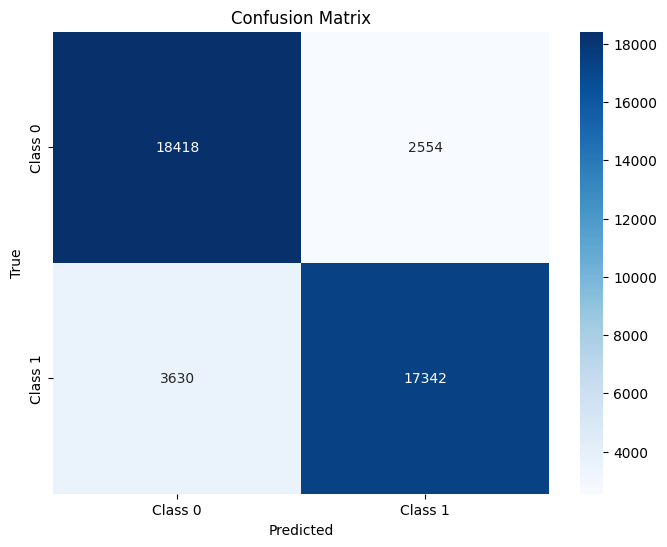

In [83]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_ANN, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###### Classification report of best ANN model trained using Google word embeddings

In [85]:
print(classification_report(y_test,y_pred_ANN, digits=4))

              precision    recall  f1-score   support

           0     0.8354    0.8782    0.8563     20972
           1     0.8716    0.8269    0.8487     20972

    accuracy                         0.8526     41944
   macro avg     0.8535    0.8526    0.8525     41944
weighted avg     0.8535    0.8526    0.8525     41944



## LSTM Google Word2vec word embeddings

In [37]:
from keras.layers import Dropout,LSTM 

###### The LSTM hypermodel is built which  will tune the number of layers (max of 3 layers) and the number of memory cells per LSTM layer

In [86]:
from keras.layers import Dropout,LSTM 

def build_model_LSTM_google(hp):
    
    model_LSTM = keras.Sequential()
    
    model_LSTM.add(Embedding(input_dim=vocab_size,
                             output_dim=embedd_dims,
                             input_length=max_review_len,
                    embeddings_initializer=Constant(embedd_matrix_google), # Set pre-trained vectors as initial weights
                    trainable=False))                              # Keep the pre-trained weights fixed during training
    
    
    for i in range(0,hp.Int('num_layers', min_value=0, max_value=2, step=1)):
        
        model_LSTM.add(LSTM(units=hp.Int('units_' + str(i),
                                          min_value=16,               # Number of memory cells per layer ranging from
                                          max_value=96,               # 16 cells to 96 cells with a step size of 16
                                          step=16),
                                          return_sequences=True))
    
    
    
    model_LSTM.add(LSTM(units=hp.Int('units_final_LSTM',              # Final LSTM Layer
                                      min_value=16,
                                      max_value=96,
                                      step=16)))
    

    model_LSTM.add(layers.Dropout(rate=hp.Choice('dropout_rate',[0.2,0.3,0.5]))) # Dropout rate tuning to prevent model overfitting
    
    model_LSTM.add(layers.Dense(1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    
    model_LSTM.compile(optimizer=Adam(learning_rate=learning_rate),
                                                  loss='binary_crossentropy',
                                                  metrics=['accuracy'])
                  
    return model_LSTM

In [87]:
build_model_LSTM_google(keras_tuner.HyperParameters())

In [28]:
# The Keras Random tuner object is instantiated.

In [88]:
tuner_LSTM_google = keras_tuner.RandomSearch(hypermodel=build_model_LSTM_google,
                                             objective="val_accuracy",
                                             max_trials=10,
                                             executions_per_trial=2,
                                             directory="Research_Project",
                                             project_name="Research_LSTM_Tuner_Amazon")

INFO:tensorflow:Reloading Tuner from Research_Project\Research_LSTM_Tuner_Amazon\tuner0.json


In [96]:
tuner_LSTM_google.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_final_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
dropout_rate (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}


In [193]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


tuner_LSTM_google.search(pad_reviews_train,
                  y_train,
                  batch_size=128,
                  epochs=50, 
                  validation_data=(pad_reviews_test, y_test),
                  callbacks=[early_stopping])

Trial 10 Complete [00h 07m 08s]
val_accuracy: 0.9153037369251251

Best val_accuracy So Far: 0.9189633727073669
Total elapsed time: 00h 54m 54s
INFO:tensorflow:Oracle triggered exit


In [121]:
tuner_LSTM_google.save()

In [97]:
tuner_LSTM_google.results_summary()       # LSTM tuning results summary

Results summary
Results in Research_Project\Research_LSTM_Tuner_Amazon
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 0
units_final_LSTM: 80
dropout_rate: 0.2
learning_rate: 0.001
units_0: 80
units_1: 48
Score: 0.9189633727073669

Trial 06 summary
Hyperparameters:
num_layers: 2
units_final_LSTM: 64
dropout_rate: 0.5
learning_rate: 0.0001
units_0: 80
units_1: 16
Score: 0.9162931442260742

Trial 00 summary
Hyperparameters:
num_layers: 2
units_final_LSTM: 16
dropout_rate: 0.5
learning_rate: 0.001
units_0: 16
units_1: 16
Score: 0.9160666465759277

Trial 03 summary
Hyperparameters:
num_layers: 2
units_final_LSTM: 48
dropout_rate: 0.3
learning_rate: 0.0001
units_0: 48
units_1: 96
Score: 0.9157209396362305

Trial 09 summary
Hyperparameters:
num_layers: 2
units_final_LSTM: 48
dropout_rate: 0.2
learning_rate: 0.0001
units_0: 48
units_1: 16
Score: 0.9153037369251251

Trial 05 summary
Hyperparameters:
num_layers: 2
units_final

In [89]:
final_model_LSTM_google= tuner_LSTM_google.get_best_models()[0]    # Get the best LSTM model

In [90]:
final_model_LSTM_google.summary()                                  # Best LSTM summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           16278600  
                                                                 
 lstm (LSTM)                 (None, 80)                121920    
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 16,400,601
Trainable params: 122,001
Non-trainable params: 16,278,600
_________________________________________________________________


In [91]:
# Predict the test set using the best LSTM model trained using Google word embeddings

y_pred_LSTM=final_model_LSTM_google.predict(pad_reviews_test)

In [39]:
# Output predicted probabilities greater than 0.5 is pridicted to be positive and negative otherwise

In [92]:
for index,pred in enumerate(y_pred_LSTM):     
    if pred>0.5:
        y_pred_LSTM[index]=1
    else:
        y_pred_LSTM[index]=0

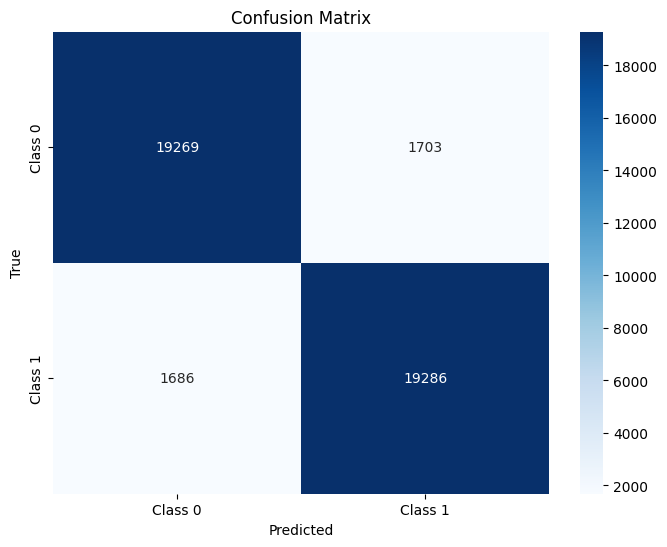

In [93]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_LSTM, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###### Classification report of best LSTM model trained using Google word embeddings

In [100]:
print(classification_report(y_test,y_pred_LSTM,digits=4))

              precision    recall  f1-score   support

           0     0.9195    0.9188    0.9192     20972
           1     0.9189    0.9196    0.9192     20972

    accuracy                         0.9192     41944
   macro avg     0.9192    0.9192    0.9192     41944
weighted avg     0.9192    0.9192    0.9192     41944



# Neural Network trained using Custom trained Word2vec word embeddings

## ANN

In [101]:
# ANN hypermodel is built to tune the hyperparameters
#The hyperparameters are defined and the number of layers and the number of neurons per layer,
# dropout rate and the learning rate of the optimizer are tuned.

def build_model_ANN_amazon(hp):
    
    model_ANN = keras.Sequential()
    
    model_ANN.add(Embedding(input_dim=vocab_size,
                    output_dim=embedd_dims,
                    input_length=max_review_len,
                    embeddings_initializer=Constant(embedd_matrix_amazon), # Set pre-trained vectors as initial weights
                    trainable=False))  # Keep the pre-trained weights fixed during training
    
    model_ANN.add(Flatten())
    
    for i in range(hp.Int('num_layers', 2, 20)):
        model_ANN.add(layers.Dense(units=hp.Int('units_' + str(i),
                                                 min_value=32,
                                                 max_value=512,
                                                 step=32),
                                                 activation='relu'))
    

    model_ANN.add(layers.Dropout(rate=hp.Choice('dropout_rate',[0.2,0.3,0.5])))
    
    model_ANN.add(layers.Dense(1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    
    model_ANN.compile(optimizer=Adam(learning_rate=learning_rate),
                                     loss='binary_crossentropy',
                                     metrics=['accuracy'])
                  
    return model_ANN

In [104]:
build_model_ANN_amazon(keras_tuner.HyperParameters())

In [40]:
# Keras Random search tuner is instantiated

In [105]:
tuner_ANN_amazon = keras_tuner.RandomSearch(hypermodel=build_model_ANN_amazon,
                                     objective="val_accuracy",
                                     max_trials=10,
                                     executions_per_trial=2,
                                     directory="Research_Project",
                                     project_name="Amazon_ANN_word2vec_new")

In [106]:
tuner_ANN_amazon.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_rate (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [107]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


tuner_ANN_amazon.search(pad_reviews_train, y_train, 
                 epochs=50, 
                 validation_data=(pad_reviews_test, y_test),
                 callbacks= [early_stopping])

Trial 10 Complete [00h 03m 43s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.8795536756515503
Total elapsed time: 00h 35m 52s
INFO:tensorflow:Oracle triggered exit


In [108]:
tuner_ANN_amazon.results_summary()

Results summary
Results in Research_Project\Amazon_ANN_word2vec_new
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
num_layers: 13
units_0: 448
units_1: 256
dropout_rate: 0.2
learning_rate: 0.0001
units_2: 64
units_3: 224
units_4: 320
units_5: 96
units_6: 32
units_7: 384
units_8: 32
units_9: 512
units_10: 32
units_11: 160
units_12: 128
units_13: 416
units_14: 480
units_15: 480
units_16: 224
units_17: 416
Score: 0.8795536756515503

Trial 01 summary
Hyperparameters:
num_layers: 2
units_0: 352
units_1: 384
dropout_rate: 0.3
learning_rate: 0.001
units_2: 448
units_3: 96
units_4: 288
units_5: 416
Score: 0.878635823726654

Trial 04 summary
Hyperparameters:
num_layers: 16
units_0: 288
units_1: 128
dropout_rate: 0.5
learning_rate: 0.0001
units_2: 320
units_3: 288
units_4: 384
units_5: 160
units_6: 96
units_7: 352
units_8: 160
units_9: 512
units_10: 480
units_11: 480
units_12: 384
units_13: 320
units_14: 128
units_15: 224
units_16: 224
u

In [41]:
# Best ANN model tuned using the Custom trained word2vec word embeddings

In [109]:
final_model_ANN_amazon= tuner_ANN_amazon.get_best_models()[0]

In [111]:
final_model_ANN_amazon.summary()                   # ANN model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           16278600  
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 448)               6720448   
                                                                 
 dense_1 (Dense)             (None, 256)               114944    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 224)               14560     
                                                                 
 dense_4 (Dense)             (None, 320)               7

In [ ]:
# Predict the test set using best ANN model trained using custom word embeddings

In [115]:
y_pred_ANN= final_model_ANN_amazon.predict(pad_reviews_test)

In [116]:
# Output predicted probabilities greater than 0.5 is pridicted to be positive and negative otherwise

for index,pred in enumerate(y_pred_ANN):
    if pred>0.5:
        y_pred_ANN[index]=1
    else:
        y_pred_ANN[index]=0

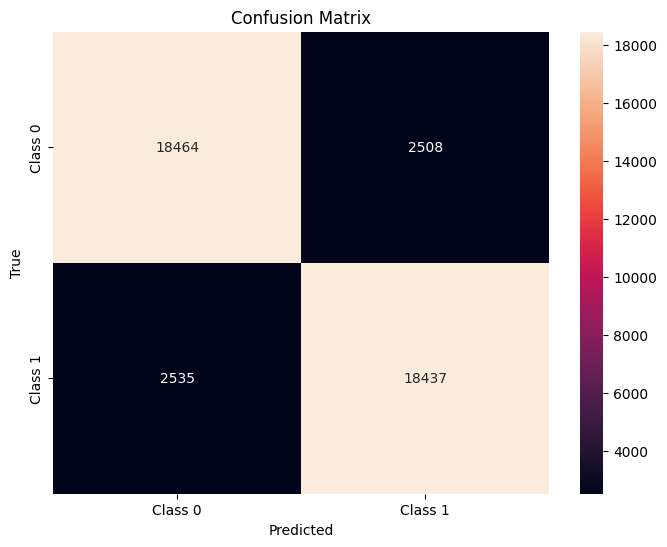

In [117]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_ANN, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",  xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

######  Classification Report ANN model trained using custom trained word embeddings

In [118]:
print(classification_report(y_test,y_pred_ANN, digits=4))

              precision    recall  f1-score   support

           0     0.8793    0.8804    0.8798     20972
           1     0.8803    0.8791    0.8797     20972

    accuracy                         0.8798     41944
   macro avg     0.8798    0.8798    0.8798     41944
weighted avg     0.8798    0.8798    0.8798     41944



## LSTM Hyperparameter Tuning using custom trained word2vec word embeddings

###### The LSTM hypermodel is built which  will tune the number of layers (max of 3 layers) and the number of memory cells per LSTM layer

In [61]:
from keras.layers import Dropout,LSTM 

def build_model_LSTM_amazon(hp):
    
    model_LSTM = keras.Sequential()
    
    model_LSTM.add(Embedding(input_dim=vocab_size,
                             output_dim=embedd_dims,
                             input_length=max_review_len,
                    embeddings_initializer=Constant(embedd_matrix_amazon), # Set pre-trained vectors as initial weights
                    trainable=False))  # Keep the pre-trained weights fixed during training
    
    
    for i in range(0,hp.Int('num_layers', min_value=0, max_value=2, step=1)):
        
        model_LSTM.add(LSTM(units=hp.Int('units_' + str(i),              # Number of memory cells per layer ranging from
                                          min_value=16,                  # 16 to 96
                                          max_value=96,
                                          step=16),
                                          return_sequences=True))                # The hidden state sequences are returned
                                                                                 # for next layer
    
    
    model_LSTM.add(LSTM(units=hp.Int('units_final_LSTM',                        # final LSTM Layer
                                      min_value=16,
                                      max_value=96,
                                      step=16)))
    

    model_LSTM.add(layers.Dropout(rate=hp.Choice('dropout_rate',[0.2,0.3,0.5])))    # Dropout tuning to prevent model overfit
    
    model_LSTM.add(layers.Dense(1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    
    model_LSTM.compile(optimizer=Adam(learning_rate=learning_rate),
                                                  loss='binary_crossentropy',
                                                  metrics=['accuracy'])
                  
    return model_LSTM

In [62]:
build_model_LSTM_amazon(keras_tuner.HyperParameters())

In [66]:
tuner_LSTM_amazon = keras_tuner.RandomSearch(hypermodel=build_model_LSTM_amazon,
                                     objective="val_accuracy",
                                     max_trials=10,
                                     executions_per_trial=2,
                                     directory="Research_Project",
                                     project_name="Research_LSTM_Tuner_Amazon_Word2vec")

In [67]:
tuner_LSTM_amazon.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_final_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
dropout_rate (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [68]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


tuner_LSTM_amazon.search(pad_reviews_train,
                  y_train,
                  batch_size=128,
                  epochs=50, 
                  validation_data=(pad_reviews_test, y_test),
                  callbacks=[early_stopping])

Trial 10 Complete [00h 05m 17s]
val_accuracy: 0.9166984558105469

Best val_accuracy So Far: 0.9230164289474487
Total elapsed time: 00h 42m 27s
INFO:tensorflow:Oracle triggered exit


In [69]:
tuner_LSTM_amazon.save()

In [70]:
tuner_LSTM_amazon.results_summary()                  # LSTM tuning results summary

Results summary
Results in Research_Project\Research_LSTM_Tuner_Amazon_Word2vec
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
num_layers: 2
units_final_LSTM: 48
dropout_rate: 0.5
learning_rate: 0.001
units_0: 96
units_1: 80
Score: 0.9230164289474487

Trial 03 summary
Hyperparameters:
num_layers: 1
units_final_LSTM: 64
dropout_rate: 0.3
learning_rate: 0.001
units_0: 32
units_1: 16
Score: 0.9188799560070038

Trial 08 summary
Hyperparameters:
num_layers: 1
units_final_LSTM: 48
dropout_rate: 0.3
learning_rate: 0.0001
units_0: 96
units_1: 80
Score: 0.9181766211986542

Trial 09 summary
Hyperparameters:
num_layers: 1
units_final_LSTM: 64
dropout_rate: 0.3
learning_rate: 0.0001
units_0: 80
units_1: 32
Score: 0.9166984558105469

Trial 02 summary
Hyperparameters:
num_layers: 1
units_final_LSTM: 16
dropout_rate: 0.5
learning_rate: 0.0001
units_0: 80
units_1: 48
Score: 0.9149699509143829

Trial 01 summary
Hyperparameters:
num_layers: 2
un

In [74]:
final_model_LSTM_amazon=tuner_LSTM_amazon.get_best_models()[0]            # Get the best LSTM model

###### Summary of the best LSTM tuned model using Custom word2vec word embeddings

In [82]:
final_model_LSTM_amazon.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           16278600  
                                                                 
 lstm (LSTM)                 (None, 50, 96)            152448    
                                                                 
 lstm_1 (LSTM)               (None, 50, 80)            56640     
                                                                 
 lstm_2 (LSTM)               (None, 48)                24768     
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 16,512,505
Trainable params: 233,905
Non-t

In [75]:
# The test set is predicted using the best LSTM model

y_pred_LSTM_amazon=final_model_LSTM_amazon.predict(pad_reviews_test)

In [76]:
# Output predicted probabilities greater than 0.5 is pridicted to be positive and negative otherwise

for index,pred in enumerate(y_pred_LSTM_amazon):
    if pred>0.5:
        y_pred_LSTM_amazon[index]=1
    else:
        y_pred_LSTM_amazon[index]=0

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

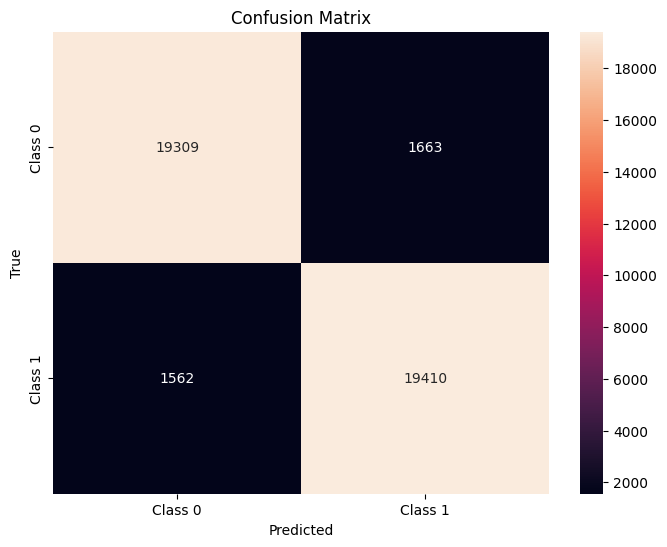

In [80]:
# List of class labels
class_labels = ['Class 0', 'Class 1']

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_LSTM_amazon, labels= [0,1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",  xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###### Classification Report of best LSTM model using Custom trained word embeddings

In [81]:
print(classification_report(y_test,y_pred_LSTM_amazon, digits=4))

              precision    recall  f1-score   support

           0     0.9252    0.9207    0.9229     20972
           1     0.9211    0.9255    0.9233     20972

    accuracy                         0.9231     41944
   macro avg     0.9231    0.9231    0.9231     41944
weighted avg     0.9231    0.9231    0.9231     41944

